In [1]:
import numpy as np

In [2]:
class LinearRegression:
    def __init__(self, alpha=0.01, num_iter=1500):
        self.alpha = alpha
        self.num_iter = num_iter
        self.theta = None
        self.theta0 = 0
        
    def predict(self, X):
        h0_x = X.dot(self.theta) + self.theta0
        return h0_x
    
    def cost(self, X, y):
        h0_x = self.predict(X)
        
        # Calculate squared error
        error = (h0_x - y) ** 2
        J_0 = np.sum(error) / (2 * len(X))  
        return J_0
    
    def gradient(self, X, y):
        m = len(X)
        h0_x = self.predict(X)
        
        dj_d0 = np.sum(h0_x - y) / m  
        dj_dtheta = np.dot(X.T, (h0_x - y)) / m  
        
        return dj_d0, dj_dtheta
    
    def gradient_descent(self, X, y):
        cost_history = []
        
        for _ in range(self.num_iter):
            dj_d0, dj_dtheta = self.gradient(X, y)
            
            self.theta0 -= self.alpha * dj_d0
            self.theta -= self.alpha * dj_dtheta
            J_0 = self.cost(X, y)
            cost_history.append(J_0) 
            
        print("Cost history length:", len(cost_history))
        return self.theta, self.theta0, cost_history

In [3]:
np.random.seed(42)
m = 100
n = 3
X = np.random.rand(m, n) * 10
y = 3 * X[:, 0] + 2 * X[:, 1] + 4 * X[:, 2] + np.random.randn(m) * 5
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

model = LinearRegression(alpha=0.01, num_iter=1500)
model.theta = np.zeros(X_scaled.shape[1])
theta, theta0, cost_history = model.gradient_descent(X_scaled, y)

print("Optimized theta:", theta)
print("Optimized theta0:", theta0)
print("Final cost:", cost_history[-1]) 

Cost history length: 1500
Optimized theta: [ 8.93119459  5.92980344 12.2843712 ]
Optimized theta0: 44.75595834347107
Final cost: 11.50498525822048


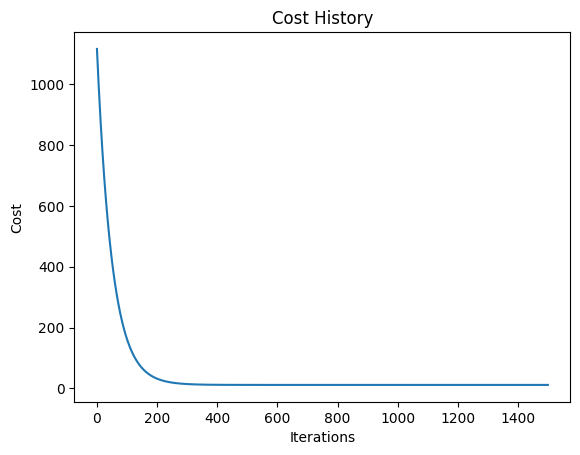

In [4]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()